In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20,9)
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [11]:
data = pd.read_csv('/content/wine.csv')
data.head(10)

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


In [12]:
data.isnull().sum()

,0
Type,0
Alcohol,0
Malic,0
Ash,0
Alcalinity,0
Magnesium,0
Phenols,0
Flavanoids,0
Nonflavanoids,0
Proanthocyanins,0


In [13]:
data.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [15]:
data.dtypes

,0
Type,int64
Alcohol,float64
Malic,float64
Ash,float64
Alcalinity,float64
Magnesium,int64
Phenols,float64
Flavanoids,float64
Nonflavanoids,float64
Proanthocyanins,float64


<Axes: >

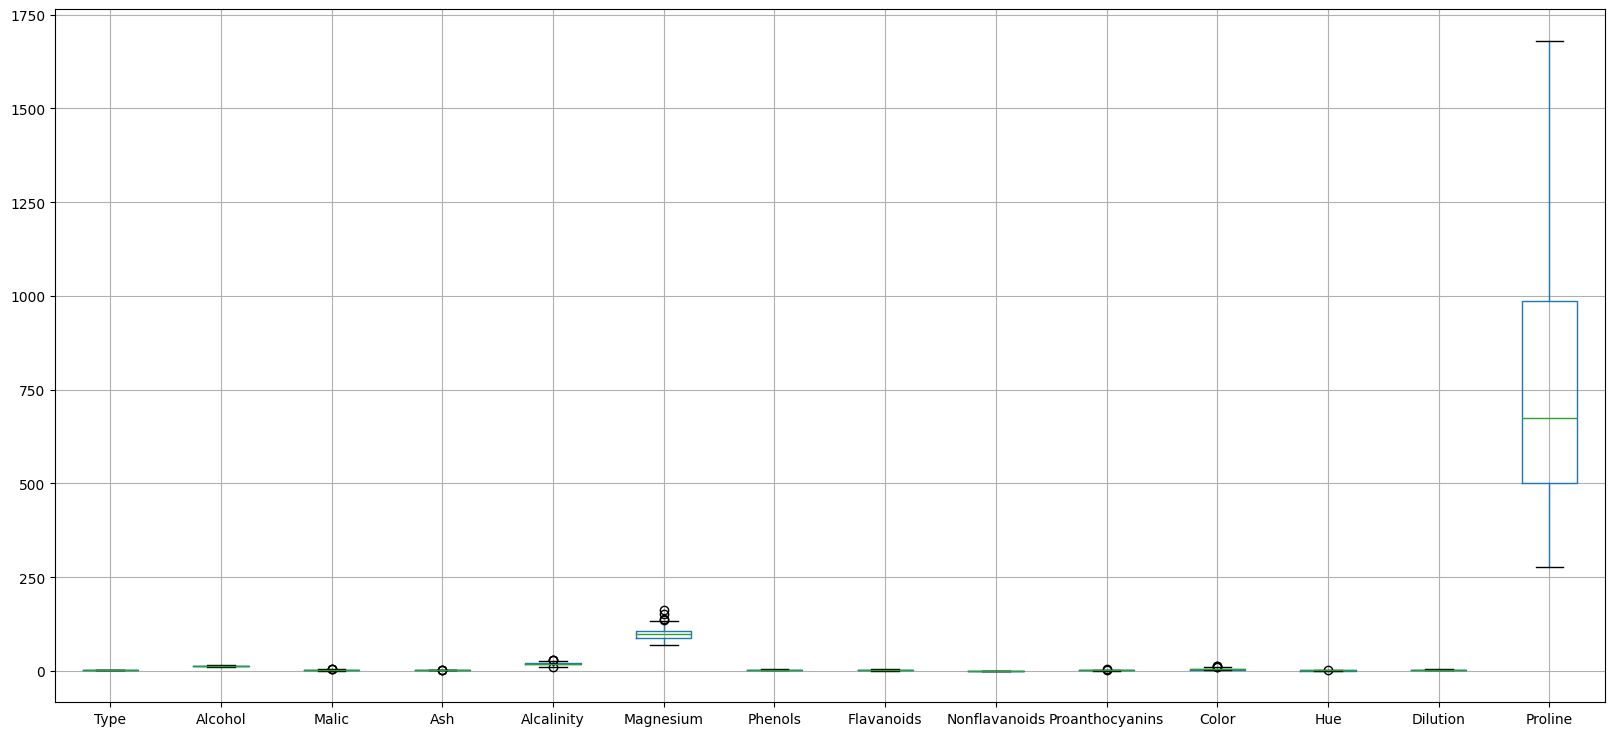

In [16]:
data.boxplot()

In [17]:
data.duplicated().sum()

np.int64(0)

In [18]:
for i in data.columns:
    print(f'unique value of {i} is = {data[i].nunique()}')

unique value of Type is = 3
unique value of Alcohol is = 126
unique value of Malic is = 133
unique value of Ash is = 79
unique value of Alcalinity is = 63
unique value of Magnesium is = 53
unique value of Phenols is = 97
unique value of Flavanoids is = 132
unique value of Nonflavanoids is = 39
unique value of Proanthocyanins is = 101
unique value of Color is = 132
unique value of Hue is = 78
unique value of Dilution is = 122
unique value of Proline is = 121


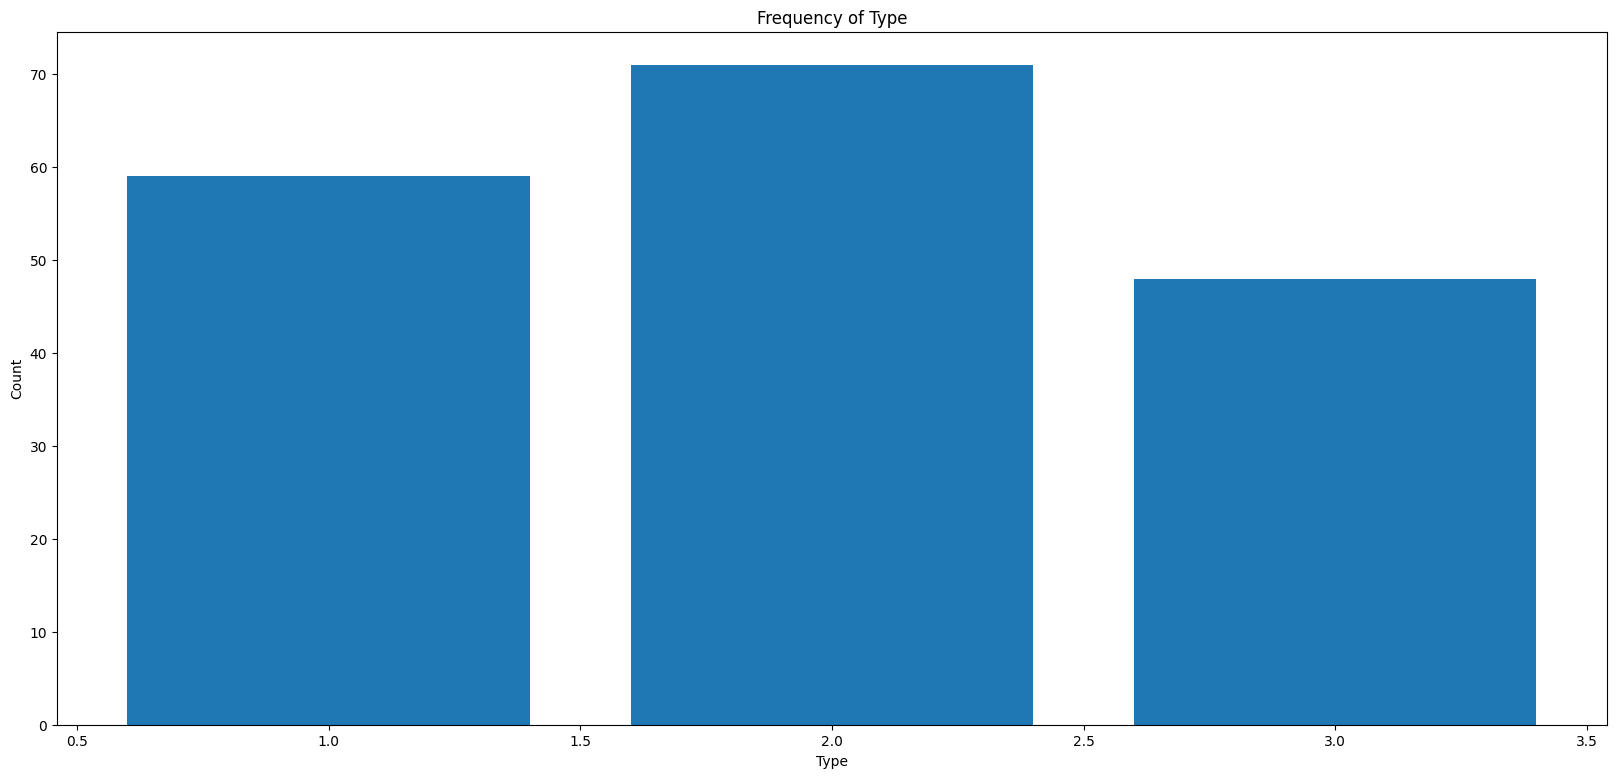

In [19]:
type_counts = data.groupby('Type').size()
plt.bar(type_counts.index, type_counts.values)
plt.title('Frequency of Type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

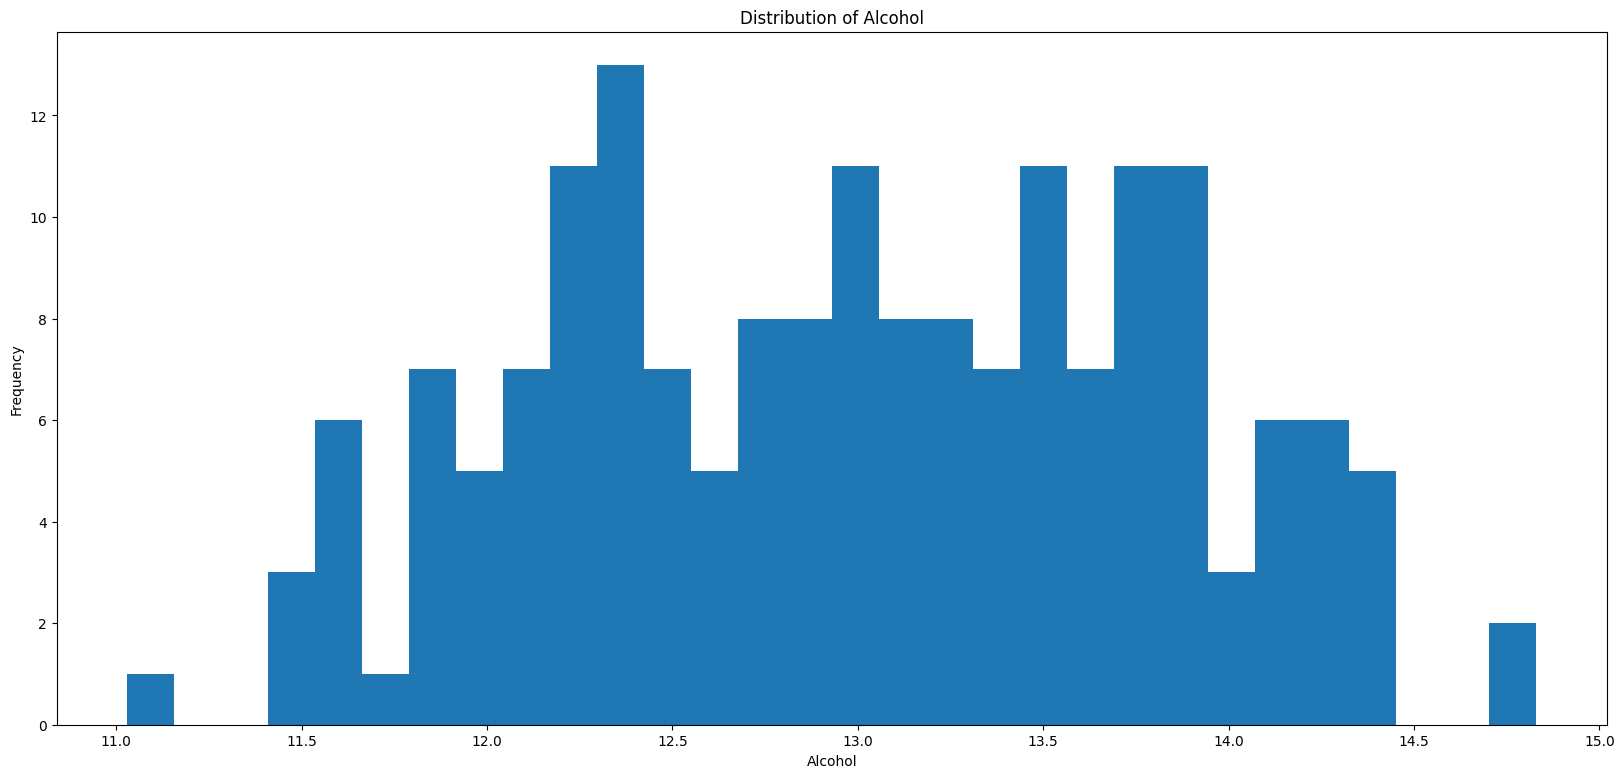

In [20]:
plt.hist(data['Alcohol'], bins=30)
plt.title('Distribution of Alcohol')
plt.xlabel('Alcohol')
plt.ylabel('Frequency')
plt.show()


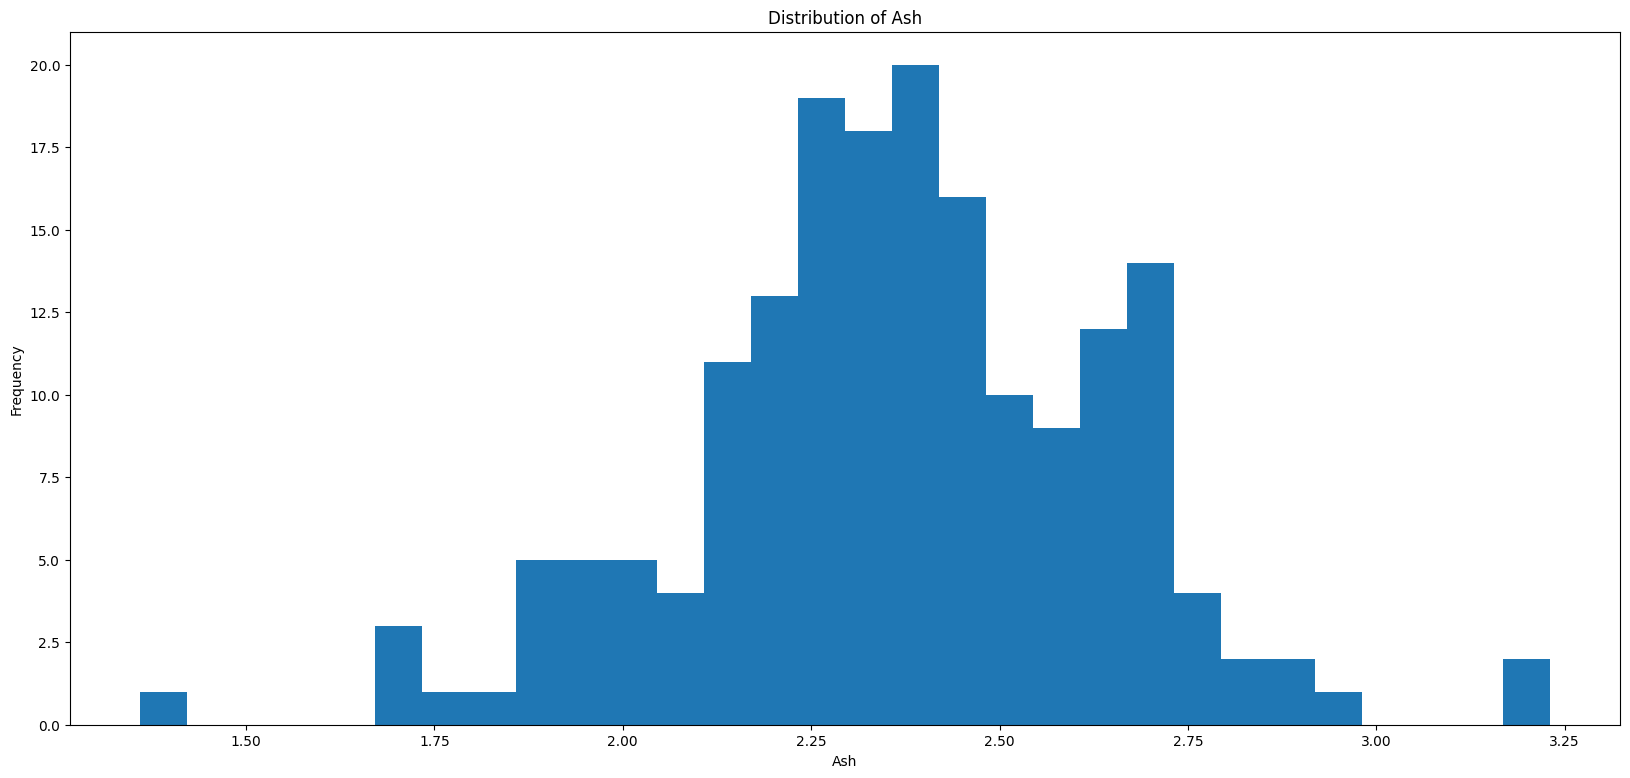

In [21]:
plt.hist(data['Ash'],bins=30)
plt.title('Distribution of Ash')
plt.xlabel('Ash')
plt.ylabel('Frequency')
plt.show()

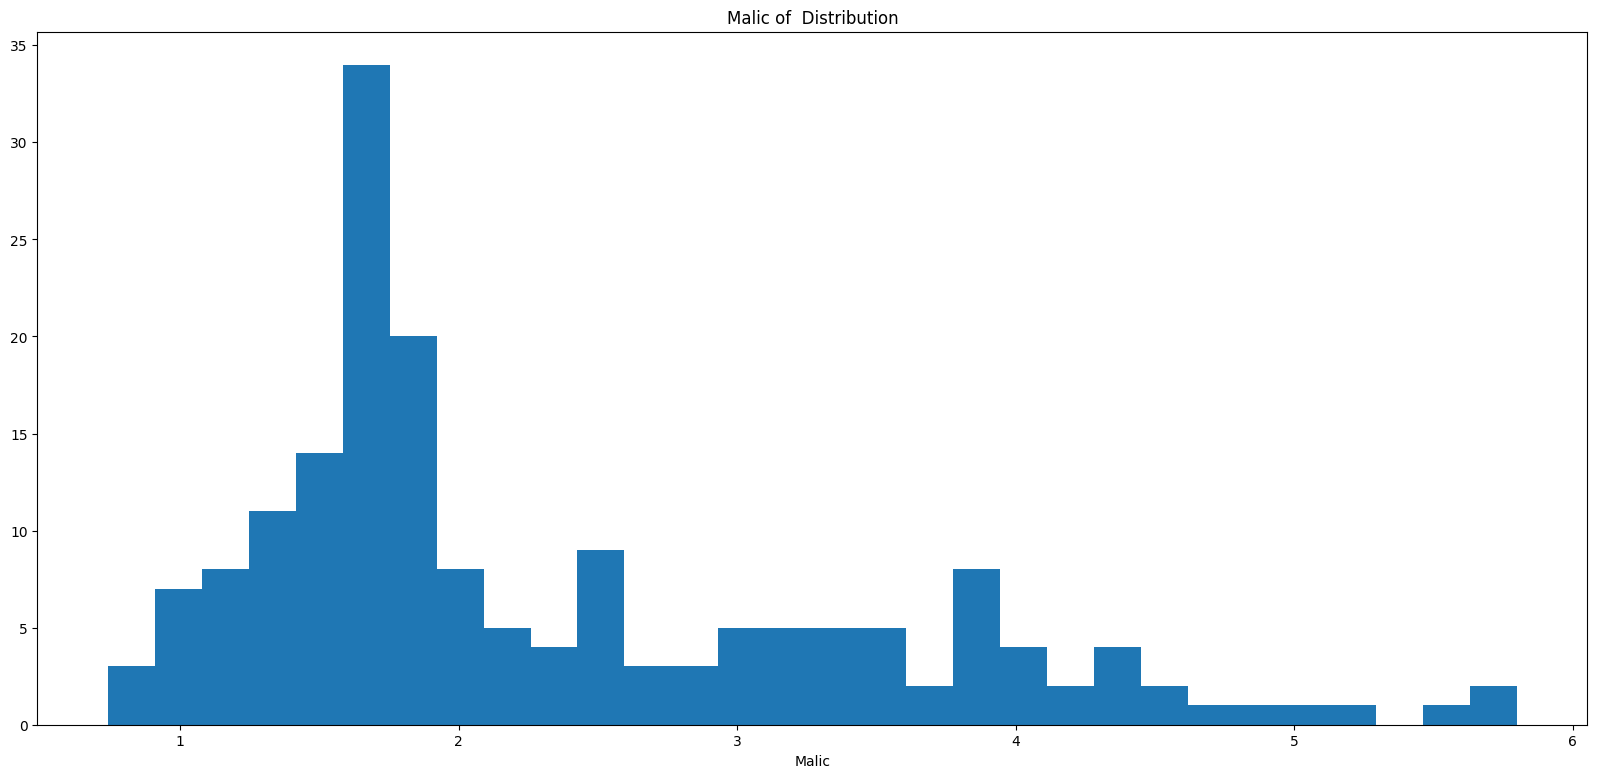

In [22]:
plt.hist(data['Malic'],bins=30)
plt.title('Malic of  Distribution')
plt.xlabel('Malic');

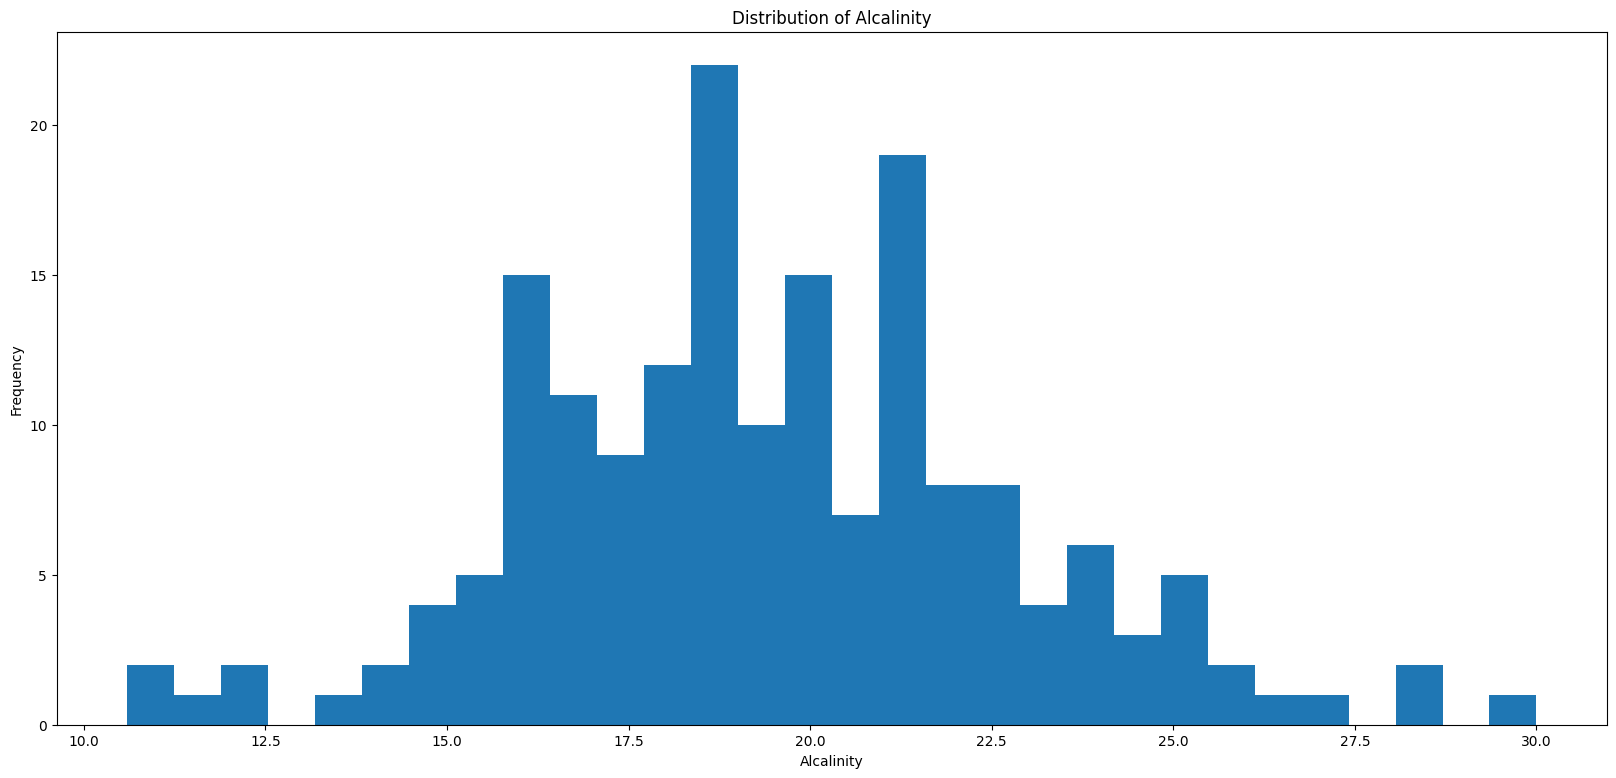

In [23]:
plt.hist(data['Alcalinity'],bins=30)
plt.title('Distribution of Alcalinity')
plt.xlabel('Alcalinity')
plt.ylabel('Frequency')
plt.show()

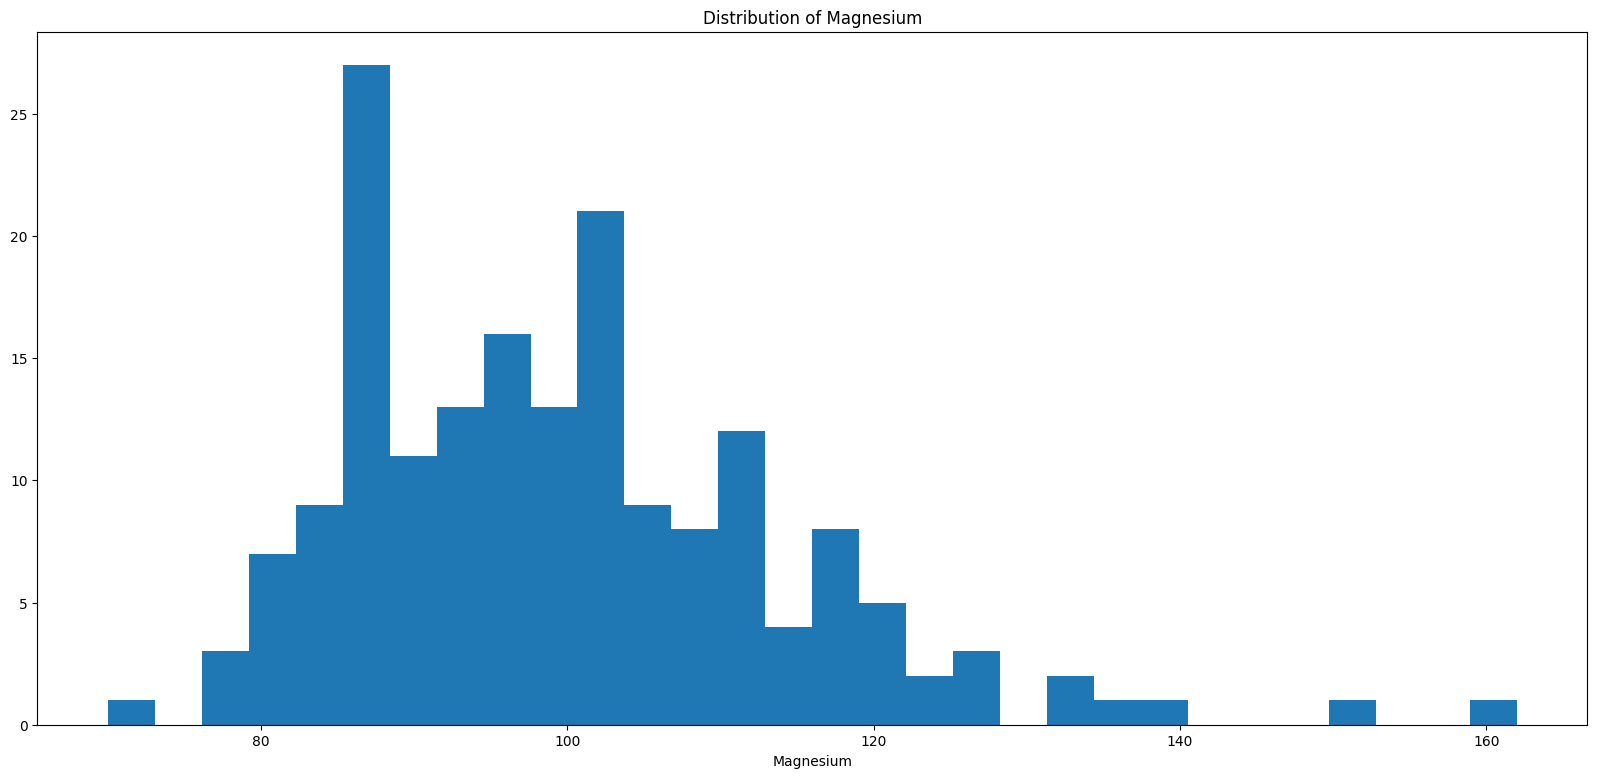

In [24]:
plt.hist(data['Magnesium'],bins=30)
plt.title('Distribution of Magnesium')
plt.xlabel('Magnesium');
plt.show()

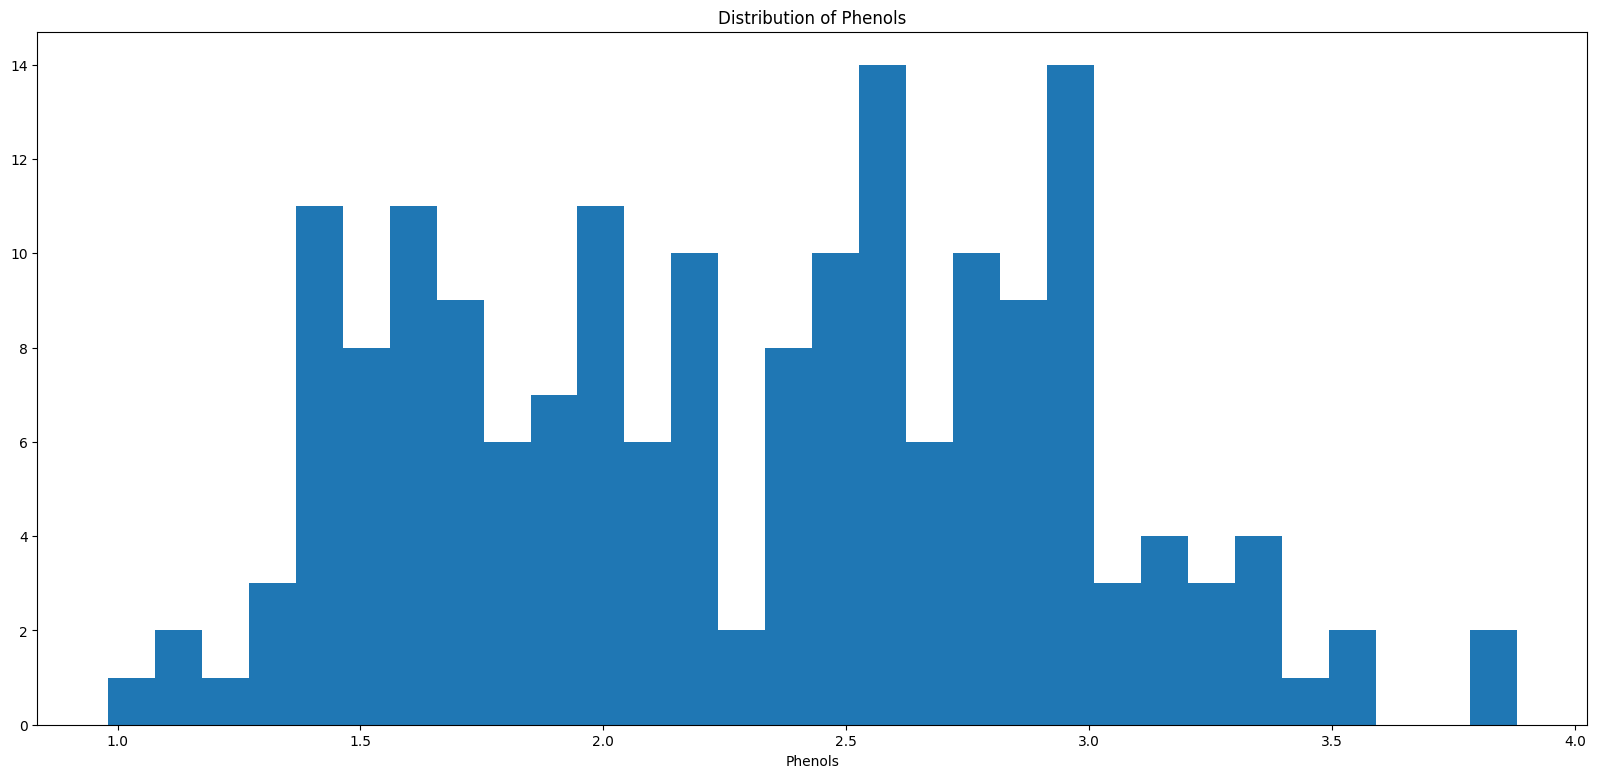

In [25]:
plt.hist(data['Phenols'],bins=30)
plt.title('Distribution of Phenols')
plt.xlabel('Phenols');
plt.show()

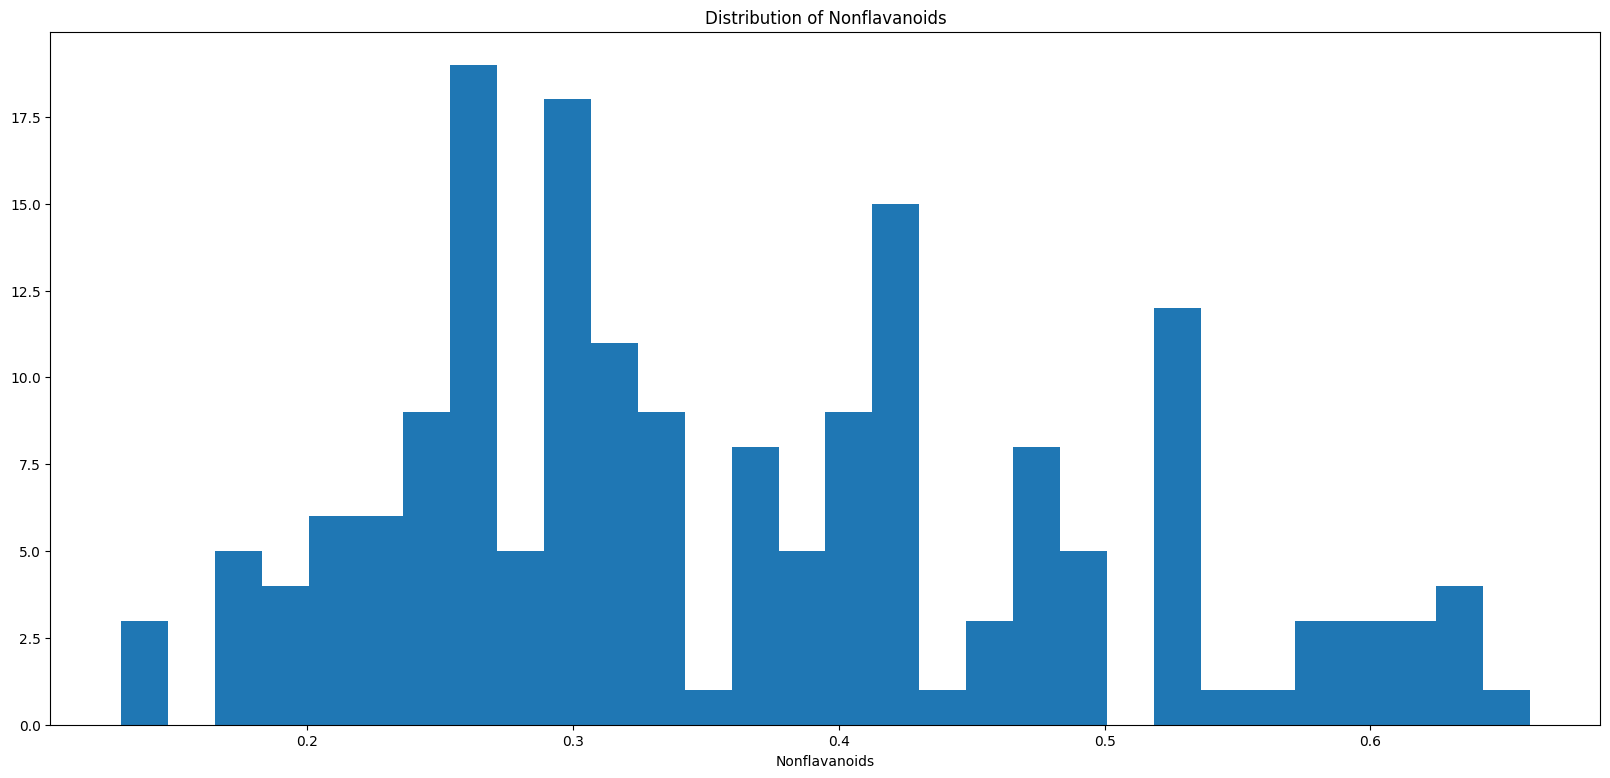

In [26]:
plt.hist(data['Nonflavanoids'],bins=30)
plt.title('Distribution of Nonflavanoids')
plt.xlabel('Nonflavanoids');
plt.show()

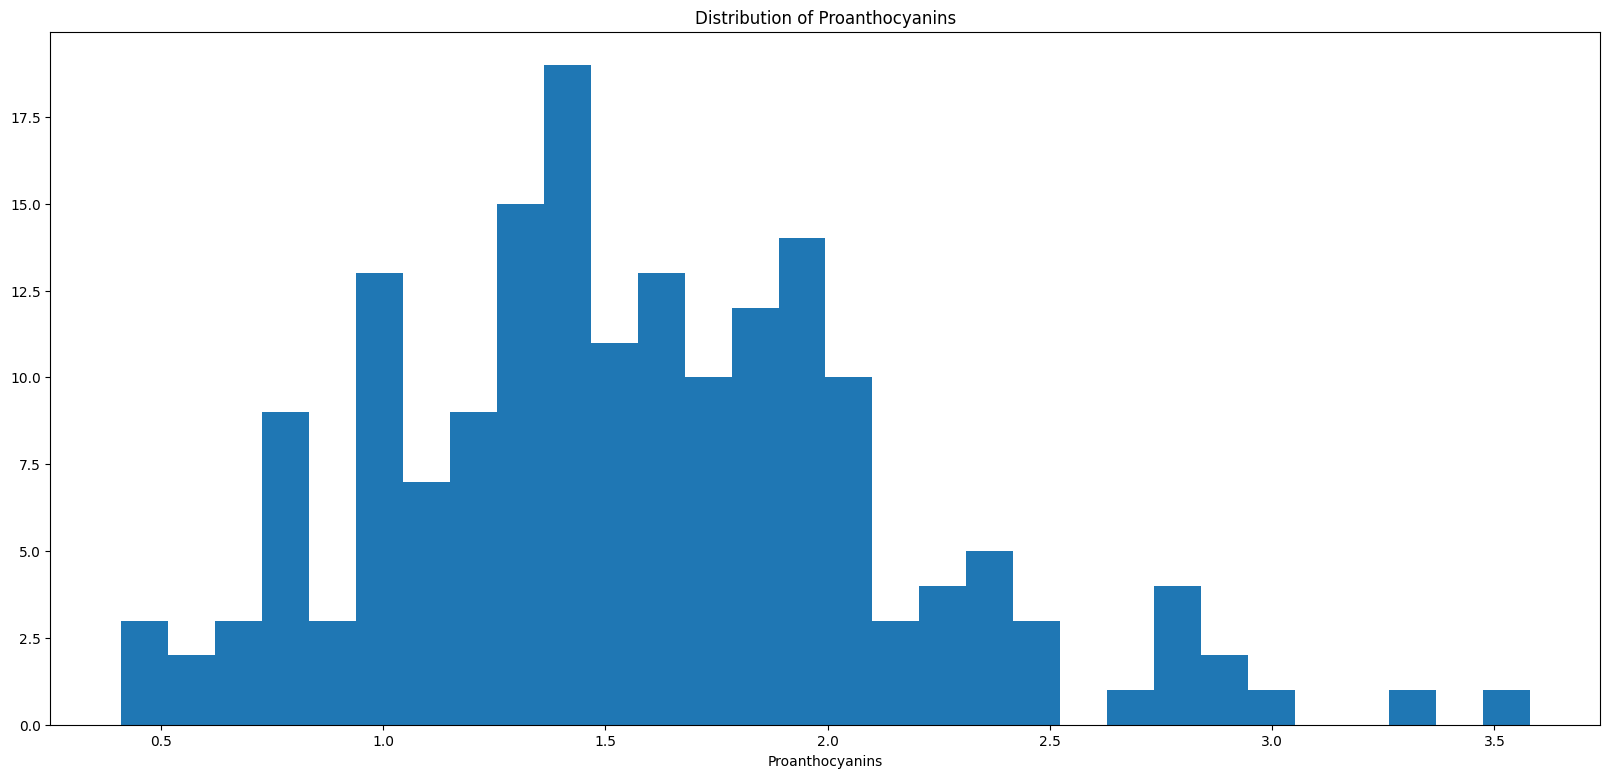

In [27]:
plt.hist(data['Proanthocyanins'],bins=30)
plt.title('Distribution of Proanthocyanins')
plt.xlabel('Proanthocyanins');
plt.show()

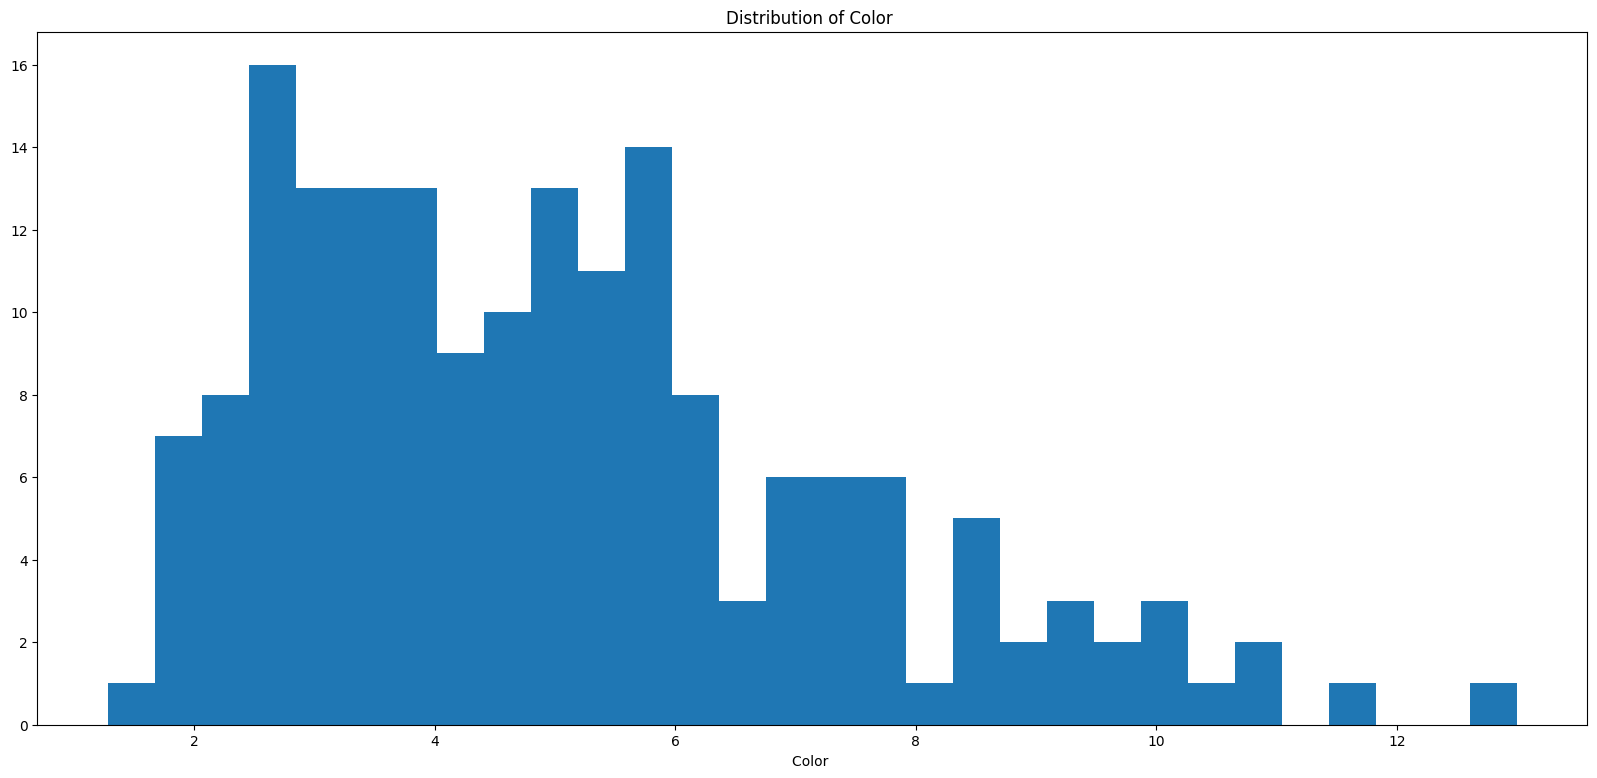

In [28]:
plt.hist(data['Color'],bins=30)
plt.title('Distribution of Color ')
plt.xlabel('Color ');
plt.show()

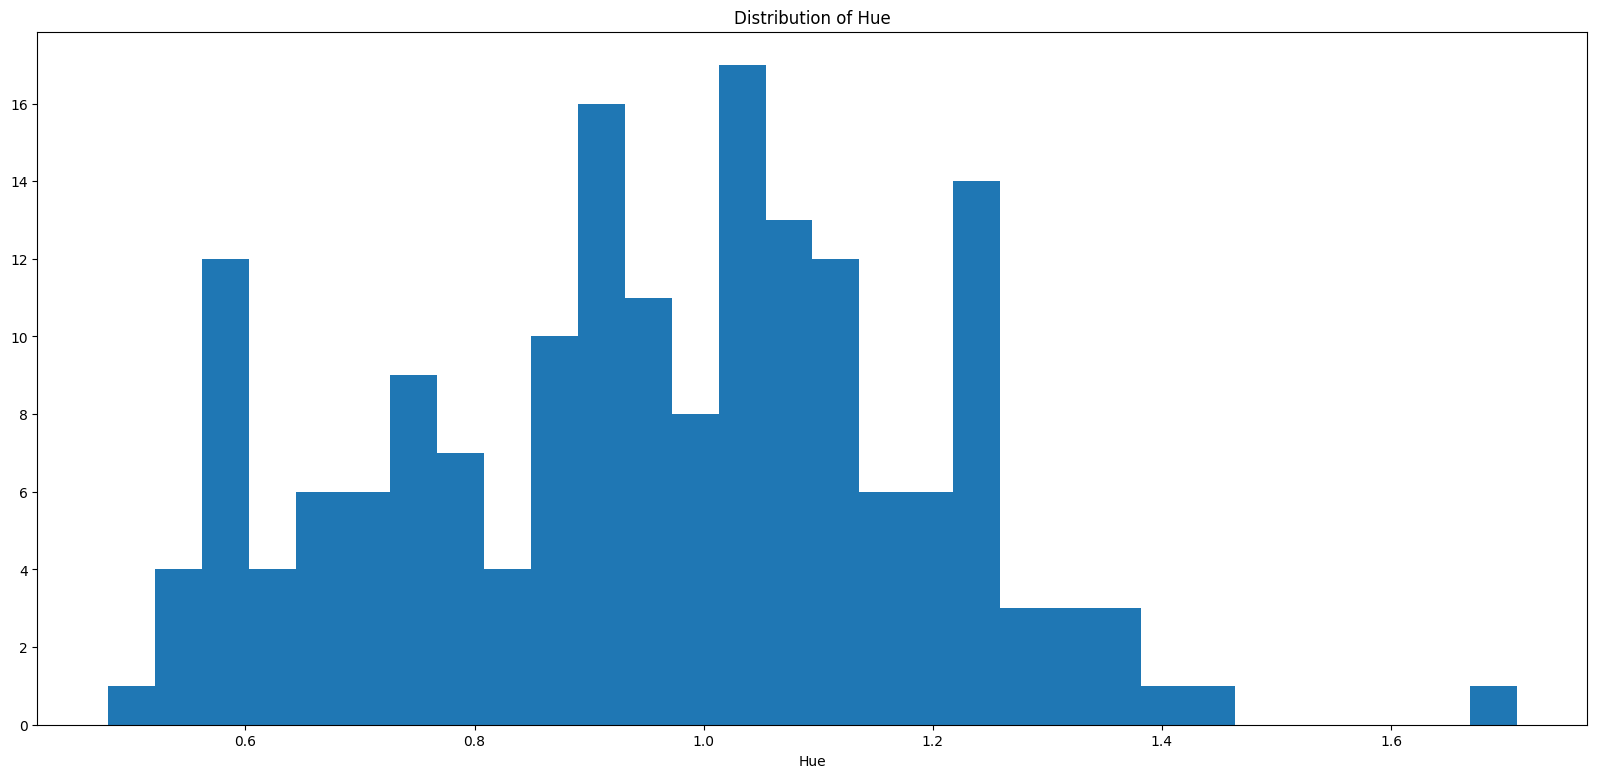

In [29]:
plt.hist(data['Hue'],bins=30)
plt.title('Distribution of Hue')
plt.xlabel('Hue');
plt.show()

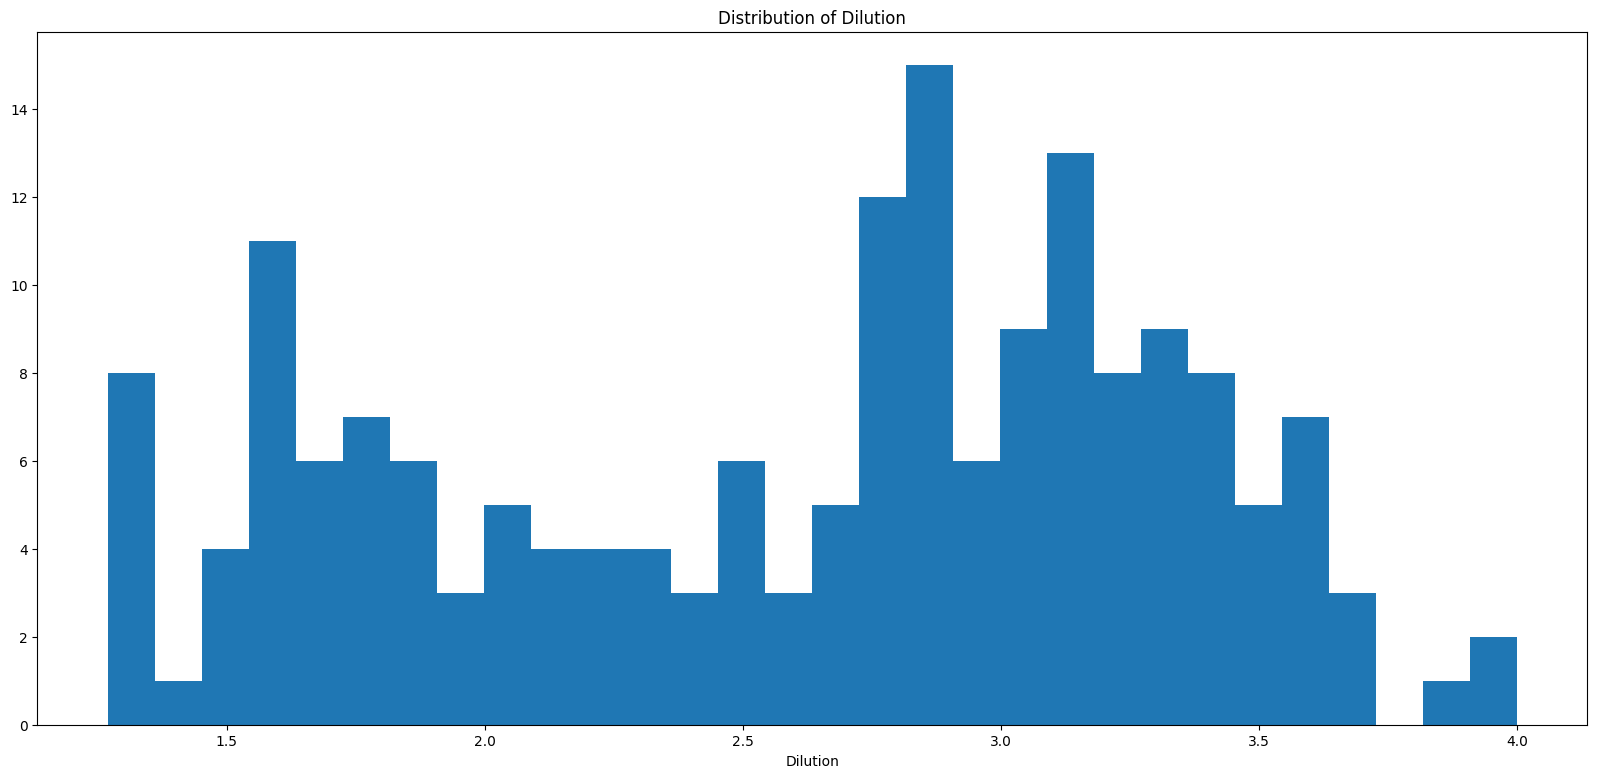

In [30]:
plt.hist(data['Dilution'],bins=30)
plt.title('Distribution of Dilution')
plt.xlabel('Dilution');
plt.show()

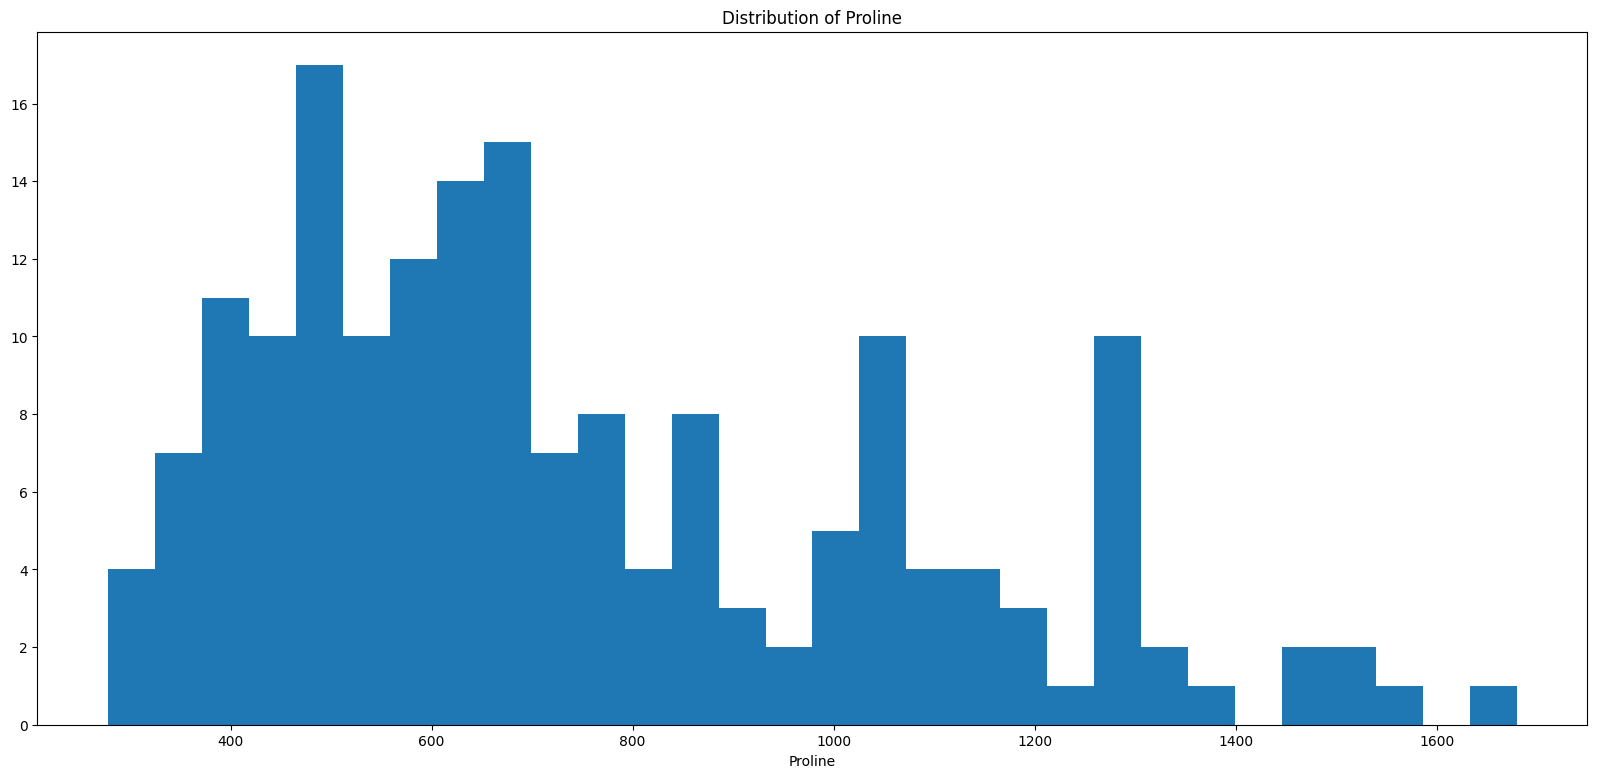

In [31]:
plt.hist(data['Proline'],bins=30)
plt.title('Distribution of Proline')
plt.xlabel('Proline');
plt.show()

<Axes: >

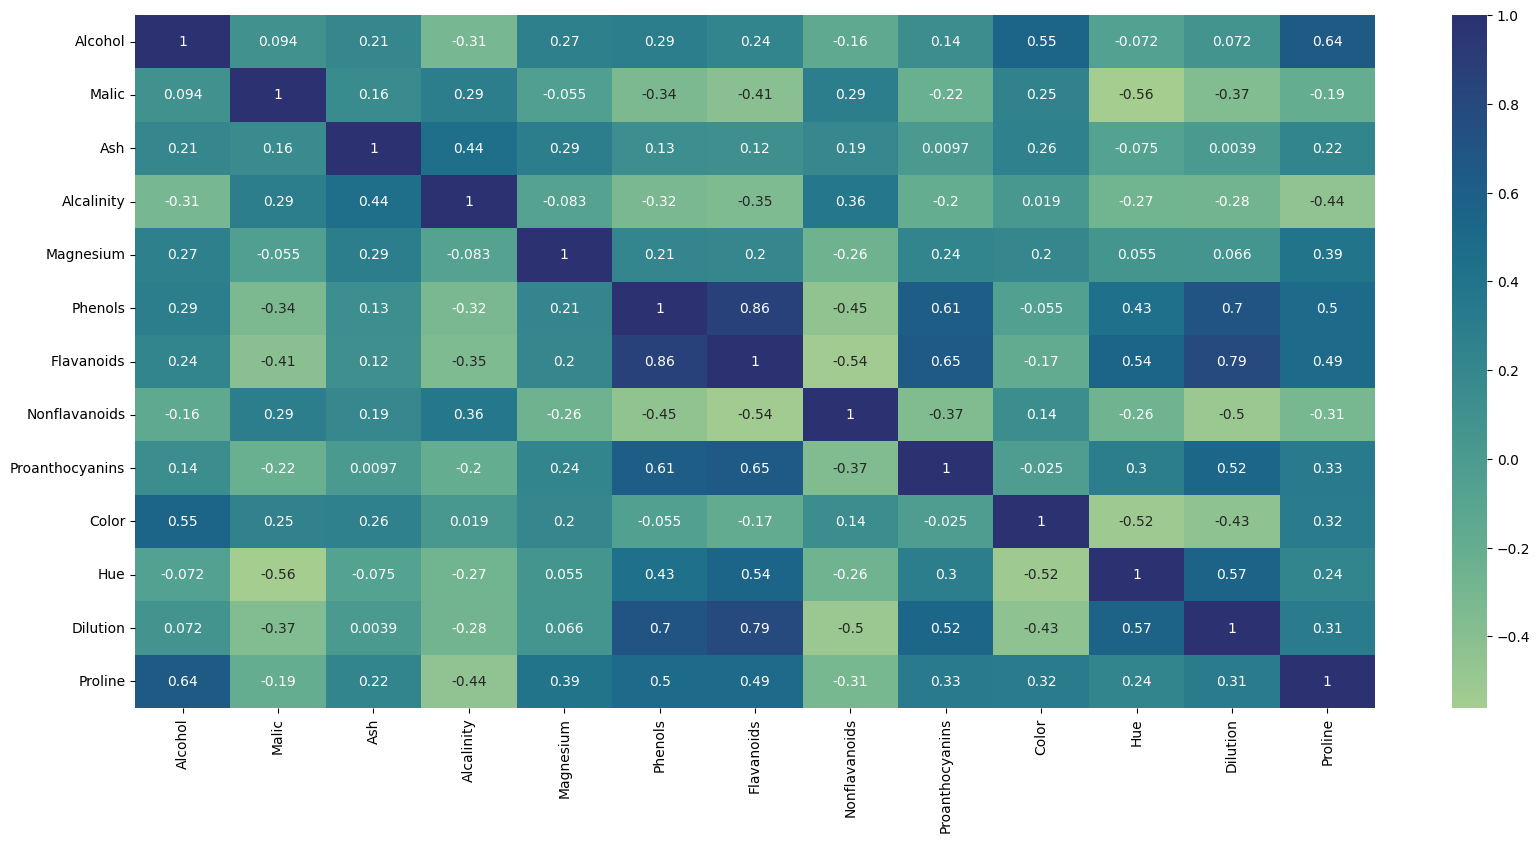

In [32]:
sns.heatmap(data.drop('Type',axis = 1).corr(), annot = True, cmap = 'crest')

In [33]:
def capping(data, columns):
    for i in columns:
        Q1 = data[i].quantile(0.25)
        Q3 = data[i].quantile(0.75)
        IQR = Q3 - Q1
        Upper = Q3 + (1.5 * IQR)
        Lower = Q1 - (1.5 * IQR)
        data[i] = data[i].clip(lower = Lower, upper = Upper)

In [34]:
capping(data, ['Malic','Ash','Alcalinity','Magnesium','Proanthocyanins','Color','Hue'])

<Axes: >

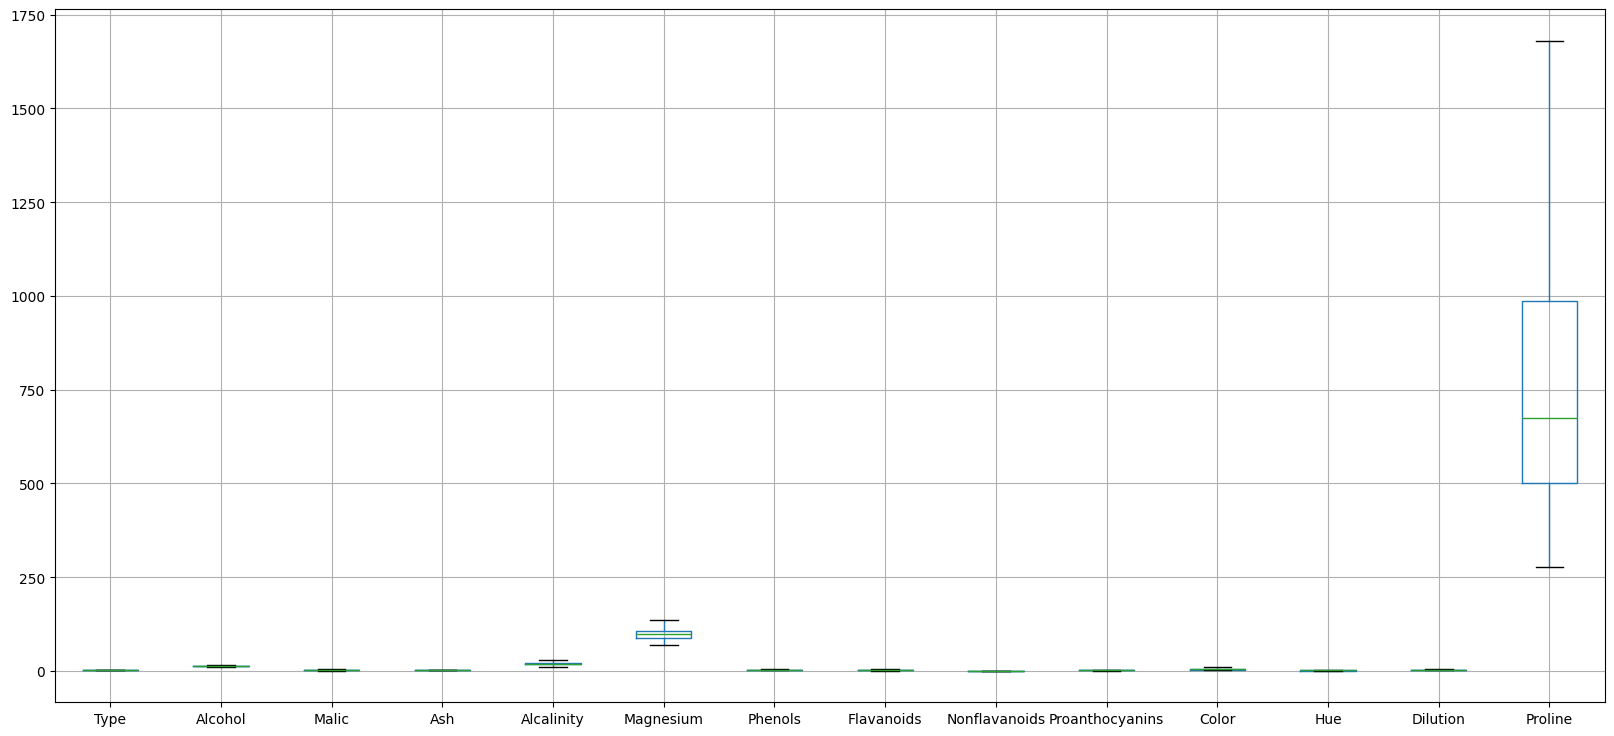

In [35]:
data.boxplot()

In [36]:
sc = StandardScaler()
data.loc[:, data.columns!='Type'] = sc.fit_transform(data.drop('Type', axis = 1))
data1 = data.copy()
data

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,1.518613,-0.565534,0.240640,-1.182882,2.057111,0.808997,1.034819,-0.659563,1.264740,0.266954,0.366610,1.847920,1.013009
1,1,0.246290,-0.501728,-0.862176,-2.524956,0.038639,0.568648,0.733629,-0.820719,-0.549904,-0.291923,0.410768,1.113449,0.965242
2,1,0.196879,0.026948,1.153315,-0.267832,0.113397,0.808997,1.215533,-0.498407,2.199012,0.284696,0.322451,0.788587,1.395148
3,1,1.691550,-0.346771,0.506837,-0.816862,1.010496,2.491446,1.466525,-0.981875,1.067105,1.225029,-0.428246,1.184071,2.334574
4,1,0.295700,0.236596,1.913878,0.464208,1.384287,0.808997,0.663351,0.226796,0.420301,-0.318536,0.366610,0.449601,-0.037874
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,0.876275,2.709072,0.316696,0.311700,-0.335152,-0.985614,-1.424900,1.274310,-0.945173,1.180674,-1.399735,-1.231206,-0.021952
174,3,0.493343,1.439792,0.430781,1.074241,0.188156,-0.793334,-1.284344,0.549108,-0.316336,1.003253,-1.134784,-1.485445,0.009893
175,3,0.332758,1.777051,-0.405838,0.159191,1.533804,-1.129824,-1.344582,0.549108,-0.424137,2.289557,-1.620528,-1.485445,0.280575
176,3,0.209232,0.236596,0.012471,0.159191,1.533804,-1.033684,-1.354622,1.354888,-0.226502,1.890359,-1.576370,-1.400699,0.296498


In [37]:
pca = PCA()
pca1 = pca.fit_transform(data.drop('Type', axis = 1))
pca2 = pd.DataFrame(pca1)
pca2

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,3.358147,1.520222,-0.126375,-0.224356,0.710891,0.176645,0.701154,0.019187,-0.689257,-1.031209,-0.359055,0.599343,-0.108299
1,2.229215,-0.333261,-2.042838,-0.365783,-0.107448,0.984902,0.048001,0.991649,0.379664,-0.208787,-0.120602,0.372289,0.003640
2,2.540057,1.036953,1.018845,0.766907,-0.363113,-0.537666,0.412691,-0.464401,1.164755,-0.136538,-0.289991,0.046713,0.042033
3,3.781124,2.782566,-0.149224,0.593304,-0.273054,-0.132210,-0.394978,0.694895,-0.001904,-0.241293,0.688896,-0.318833,-0.380455
4,1.016872,0.955225,2.113169,-0.431732,0.357108,0.386733,0.487160,0.377559,-0.283486,0.036566,-0.577236,-0.165368,-0.050547
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,-3.311751,2.173369,-0.383365,0.925038,-0.633273,1.060998,0.685717,-0.130305,0.027147,0.235376,0.111934,0.102554,-0.135217
174,-2.612425,1.797712,0.210332,0.398412,0.192034,-0.011534,0.136131,-0.565178,0.063488,0.222939,0.236649,-0.309409,-0.181156
175,-2.671169,2.865301,-0.975126,0.360633,1.185098,-0.354148,0.853504,0.013484,-0.020689,0.267263,0.595734,0.646957,-0.025525
176,-2.371603,2.393808,-0.561485,-0.643948,0.658651,-1.252325,0.813131,0.351025,-0.086492,-0.495366,0.353956,0.346681,-0.083471


In [38]:
np.cumsum(pca.explained_variance_ratio_)

array([0.36475803, 0.56085577, 0.66996759, 0.74059137, 0.8035612 ,
       0.85171187, 0.89202691, 0.91947224, 0.9417974 , 0.96110846,
       0.97866279, 0.99192912, 1.        ])

In [39]:
pca.explained_variance_ratio_

array([0.36475803, 0.19609775, 0.10911182, 0.07062378, 0.06296983,
       0.04815067, 0.04031504, 0.02744533, 0.02232516, 0.01931106,
       0.01755433, 0.01326634, 0.00807088])

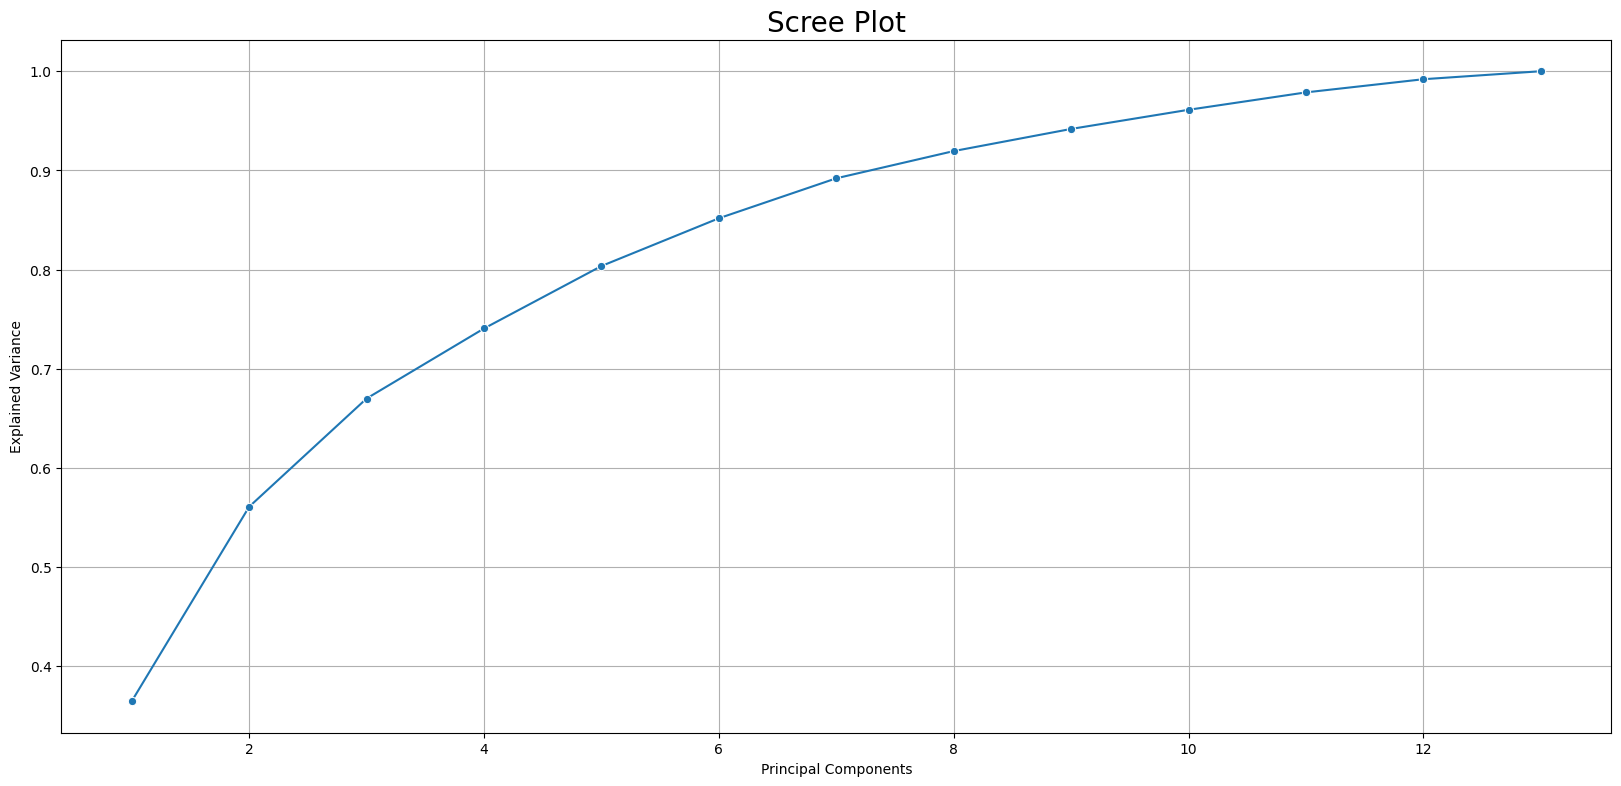

In [40]:
sns.lineplot(x=range(1, len(pca.explained_variance_ratio_)+1),
             y=np.cumsum(pca.explained_variance_ratio_),
             marker='o')

plt.xlabel('Principal Components')
plt.ylabel('Explained Variance')
plt.title('Scree Plot', fontsize=20)
plt.grid(True)
plt.show()

In [41]:
pca2 = PCA(n_components=8)
pca2_df = pca2.fit_transform(data.drop('Type', axis=1))  # use pca2 here
pca_cl = pd.DataFrame(pca2_df, columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8'])
pca_cl

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,3.358147,1.520222,-0.126375,-0.224356,0.710891,0.176645,0.701154,0.019187
1,2.229215,-0.333261,-2.042838,-0.365783,-0.107448,0.984902,0.048001,0.991649
2,2.540057,1.036953,1.018845,0.766907,-0.363113,-0.537666,0.412691,-0.464401
3,3.781124,2.782566,-0.149224,0.593304,-0.273054,-0.132210,-0.394978,0.694895
4,1.016872,0.955225,2.113169,-0.431732,0.357108,0.386733,0.487160,0.377559
...,...,...,...,...,...,...,...,...
173,-3.311751,2.173369,-0.383365,0.925038,-0.633273,1.060998,0.685717,-0.130305
174,-2.612425,1.797712,0.210332,0.398412,0.192034,-0.011534,0.136131,-0.565178
175,-2.671169,2.865301,-0.975126,0.360633,1.185098,-0.354148,0.853504,0.013484
176,-2.371603,2.393808,-0.561485,-0.643948,0.658651,-1.252325,0.813131,0.351025


In [42]:
wcss = []
k = range(1,11)
for i in k:
    kmeans = KMeans(n_clusters=i, random_state = 42)
    kmeans.fit(data.drop('Type', axis = 1))
    wcss.append(kmeans.inertia_)

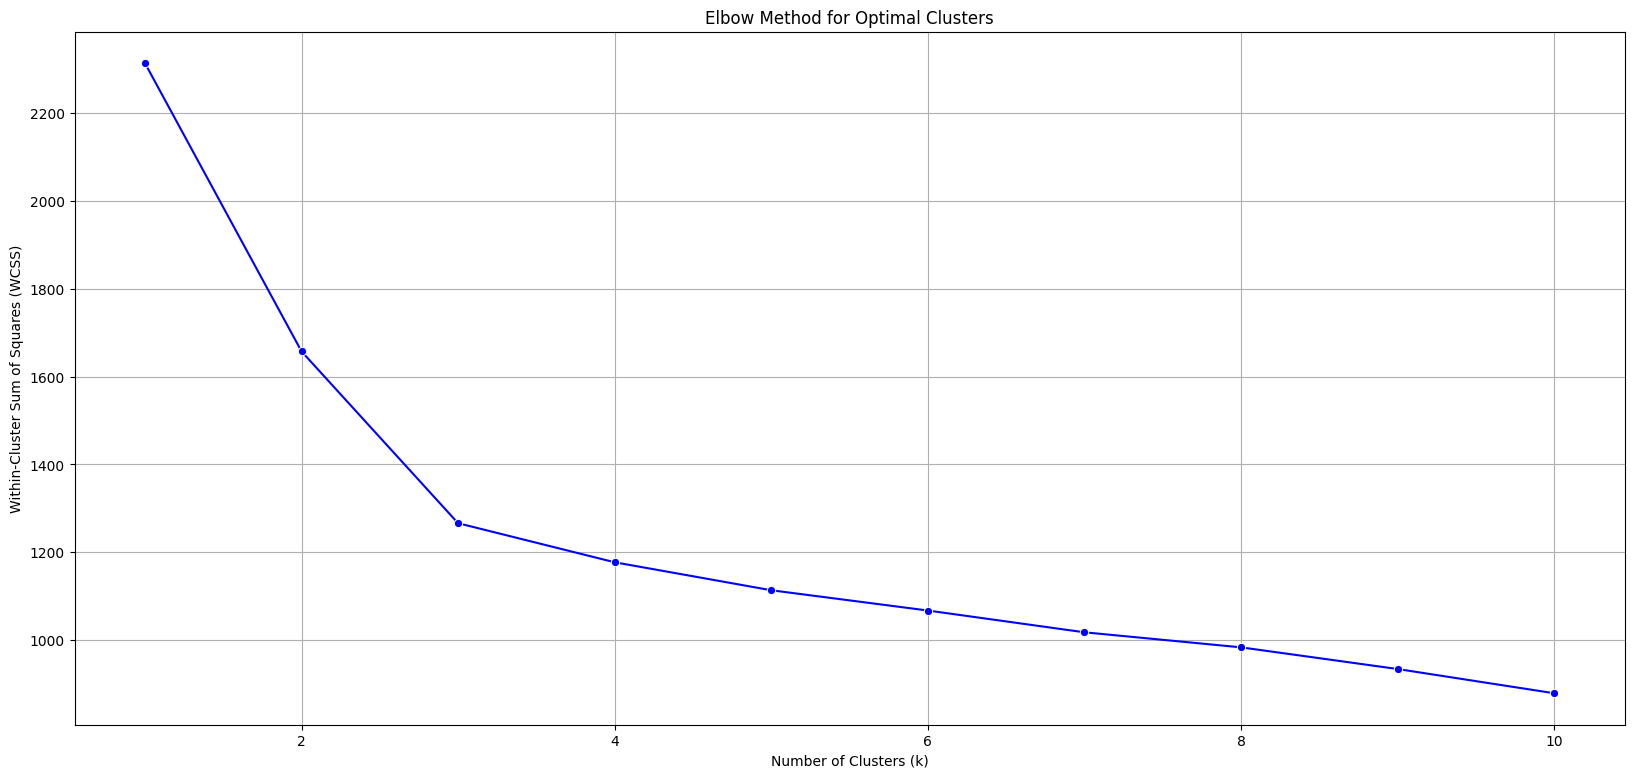

In [43]:
elbow_df = pd.DataFrame({'k': k, 'WCSS': wcss})

sns.lineplot(data=elbow_df, x='k', y='WCSS', marker='o', color='blue')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.grid(True)
plt.show()

In [45]:
kmean = KMeans(n_clusters = 3, random_state = 42)
data['Cluster'] = kmean.fit_predict(data.drop('Type',axis = 1))

In [46]:
score = silhouette_score(data.drop(columns=['Type','Cluster'],axis = 1), data['Cluster'])
print(f'Score of Silhouette is : {score}')

Score of Silhouette: 0.2854626783251893


In [48]:
def calculate_wcss(data, max_k):
    wcss = []
    for i in range(1, max_k + 1):
        model = KMeans(n_clusters=i, random_state=42)
        model.fit(data)
        wcss.append(model.inertia_)
    return wcss

wcss1 = calculate_wcss(pca_cl, 10)

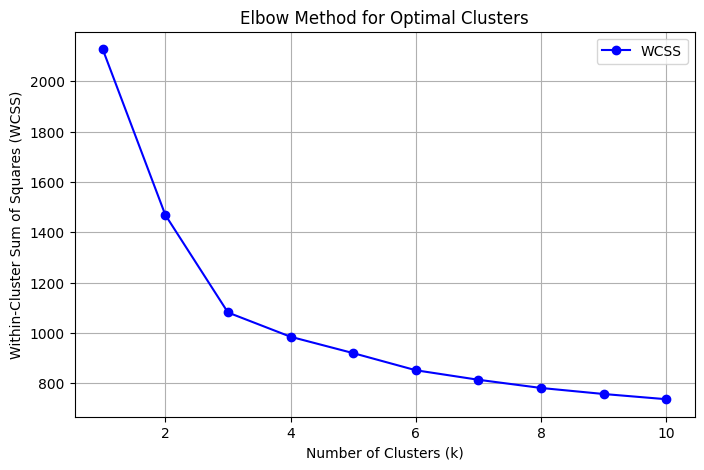

In [49]:
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111)
ax.plot(k, wcss1, 'bo-', label='WCSS')
ax.set_title('Elbow Method for Optimal Clusters')
ax.set_xlabel('Number of Clusters (k)')
ax.set_ylabel('Within-Cluster Sum of Squares (WCSS)')
ax.legend()
plt.grid(True)
plt.show()

In [50]:
kmeans1 = KMeans(n_clusters = 3, random_state = 42)
pca_cl['Cluster'] = kmeans1.fit_predict(pca_cl)

In [52]:
score1 = silhouette_score(pca_cl.drop(columns=['Cluster'],axis = 1), pca_cl['Cluster'])
print(f'Score of Silhouette is : {score1}')

Score of Silhouette is : 0.31529417780586927
